### Description

- User opens terminal
- User gets asked about the ziel funktions vektor
- User types in the linear inequity constraints
- Program visualizes the constrains the the ziel funktionsvektor
- in case of integer linear programming the solution will be visible in the plot
- in the relaxation of an integer linear progam the user may want to use the branch-and-bound method to identify the optimal point

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np

[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]


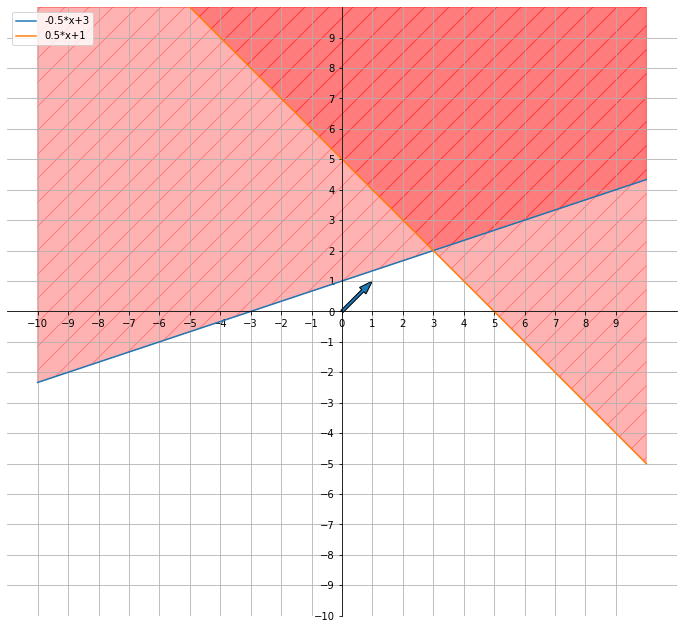

In [3]:
from turtle import width


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

def f(x):
    return 1/3*x+1
def f_2(x):
    return -1*x+5
x = np.linspace(-10, 10, 10)
print(x)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.arrow(0, 0, 1, 1, width=0.1, length_includes_head=True)

plt.plot(x, f(x), label="-0.5*x+3")
plt.plot(x, f_2(x), label="0.5*x+1")

ax.set_xticks(np.arange(-10, 10))
ax.set_yticks(np.arange(-10, 10))

ax.set_ylim([-10, 10])

plt.fill_between(
    x=x,
    y1=f(x),
    y2=np.max(x),
    color="red",
    alpha=0.3,
    hatch="/"
)
plt.fill_between(
    x=x,
    y1=f_2(x),
    y2=np.max(x),
    color="red",
    alpha=0.3,
    hatch="/"
)
# plt.fill_between(
#     x=x,
#     y1=np.min(x),
#     color="red",
#     alpha=0.3,
#     hatch="/"
# )

plt.grid()
plt.gca().set_aspect("equal")
plt.legend(loc="upper left")
plt.show()

In [282]:
import matplotlib.pyplot as plt
from sympy import Rel, symbols, solve
from sympy.plotting import plot 
from sympy.plotting import plot_implicit
import numpy as np
import sympy

x1, x2 = symbols('x1 x2')
eq = Rel(-1*x1-1*x2, 0, "<=")
res = solve(eq, x2)
foo = res.args[1].args[1]
print(res.args[1])
print(foo)
c = foo.as_coeff_Add()
i = c[0]
s = c[1].args[0]
print(i, s)

x2 >= -x1
-x1
0 -1


In [286]:
type(res.args[1])

sympy.core.relational.GreaterThan

In [283]:
x1, x2 = symbols('x1 x2')
eq1 = Rel(1*x1+1*x2, 2, "<=")
res1 = solve(eq1, x2)
foo1 = res1.args[1].args[1]
print(res1.args[1])
print(foo1)
c = foo1.as_coeff_Add()
i = c[0]
s = c[1].args[0]
print(i, s)

x2 <= 2 - x1
2 - x1
2 -1


-x1

In [266]:
foo.args[0]

2

In [160]:
from sympy import *
from matplotlib import style

style.use("tableau-colorblind10")

eq = Rel(-1*x1-1*x2, 0, ">=")
res = solve(eq, x2)
res.args[1]
eq2 = Rel(1*x1+2*x2, 2, ">=")
res2 = solve(eq2, x2)
eq3 = Rel(-1*x1+2*x2, -6, ">=")
res3 = solve(eq3, x2)
po = plot_implicit(
                    Or(res.args[1], 
                    res2.args[1], 
                    res3.args[1]),
                    title="Situation",
                    line_color="red",
                    alpha=0.3,
                    hatch="/",
                    show=False,
                    backend="matplotlib"
                    )
series = po[0]
data, action = series.get_points()
data = np.array([(x_int.mid, y_int.mid) for x_int, y_int in data])
X = data[:,1]
y = data[:,0]

In [21]:
from sympy.parsing.sympy_parser import parse_expr

foo = "2*x1 -1*x2"
eq = parse_expr(foo)
x = eq.args[1].args[0]
y = eq.args[0].args[0]

y


-1

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sympy.parsing.sympy_parser import parse_expr
from sympy.solvers import solve
from sympy import symbols
from sympy import Rel

In [79]:
x1, x2 = symbols('x1 x2')
lhs, rhs = parse_expr("0*x1 + 3*x2 <= 180").args
eq = Rel(lhs, rhs, "<=")
solved_iqs = solve(eq, x2)
solved_iqs

(-oo < x2) & (x2 <= 60)

In [4]:
def extract_vars(ieq):
    b = None
    m = None
    lhs, rhs = ieq.args
    if rhs.is_Integer or rhs.is_Float:
        return None, float(rhs)
        
    for arg in rhs.args:
        if arg.is_Integer or arg.is_Float:
            b = arg # Intercept
        elif arg.is_Mul and not m:
            for arg in arg.args:
                if not arg.is_Symbol:
                    m = float(arg)
    return m, b


def find_func(solved_ieqs):
    for iq in solved_ieqs.args:
        if not contains_infinite(iq):
            return iq
            
def contains_infinite(x):
    for arg in x.args:
        if arg.is_infinite:
            return True
    return False


f = find_func(solved_iqs)
print(f)
m, b = extract_vars(f)
print(m, b)

NameError: name 'solved_iqs' is not defined

In [7]:

x1, x2 = symbols('x1 x2')
lhs, rhs = parse_expr("-5*x1+2*x2 <= 10").args
eq = Rel(lhs, rhs, "<=")
solved_iqs = solve(eq, x2)
f = find_func(solved_iqs)

print(f)

m, b = extract_vars(f)
print(m, b)
def extract_vars(ieq):
    b = None
    m = None
    lhs, rhs = ieq.args
    print(type(ieq))
    if rhs.is_Integer or rhs.is_Float:
        return None, float(rhs)
        
    for arg in rhs.args:
        if arg.is_Integer or arg.is_Float:
            b = arg # Intercept
        elif arg.is_Mul and not m:
            for arg in arg.args:
                if not arg.is_Symbol:
                    m = float(arg)
    return m, b

x2 <= 5*x1/2 + 5
<class 'sympy.core.relational.LessThan'>
2.5 5


In [9]:
from sympy import simplify, expand, cancel

eq = parse_expr("2x1-*x2")
eq = cancel(eq)
eq

300*x1 + 500*x2

In [12]:
simplify(eq)

300*x1 + 500*x2